# This notebook will be mainly used for capstone project

In [16]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Hello Capstone Project Course')

Hello Capstone Project Course


# 1. Introduction

Traffic accidents are a significant source of deaths, injuries, property damage, and a major concern for public health and traffic safety. Accidents are also a major cause of traffic congestion and delay. Effective management of accident is crucial to mitigating accident impacts and improving traffic safety and transportation system efficiency. Accurate predictions of severity can provide crucial information for emergency responders to evaluate the severity level of accidents, estimate the potential impacts, and implement efficient accident management procedures. By recognizing the key factors that influence accident severity, the solution may be of great utility to various Government Departments/Authorities like DOT and Police. The results of analysis and modeling can be used by these Departments to take appropriate measures; such as early warning system to drivers; to reduce accident impact and thereby improve traffic safety. It is also useful to the Insurers in terms of reduced claims and better underwriting as well as rate making.

# 2. Data Understanding

The dataset come from City of Seattle Open Data Portal that contains all types of collisions from 2004 to Present. This raw dataset consists of 221,266 cases and 40 attributes. The attributes is described  in this link https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

### Acquiring the data

In [1]:
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-09-09 15:30:02--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.202.76.40, 34.235.215.225, 54.152.131.176
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.202.76.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘collisions.csv’

collisions.csv          [             <=>    ]  80.92M  17.2MB/s    in 4.6s    

2020-09-09 15:30:07 (17.6 MB/s) - ‘collisions.csv’ saved [84855377]



***

### Load collisions data into dataframe

In [14]:
df = pd.read_csv('collisions.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [11]:
print("Number of cases: %d and number of attributes: %d" %(df.shape[0], df.shape[1]))

Number of cases: 221266 and number of attributes: 40


In [13]:
#dataset information and dytpe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

***

### Displaying Dependent Variable

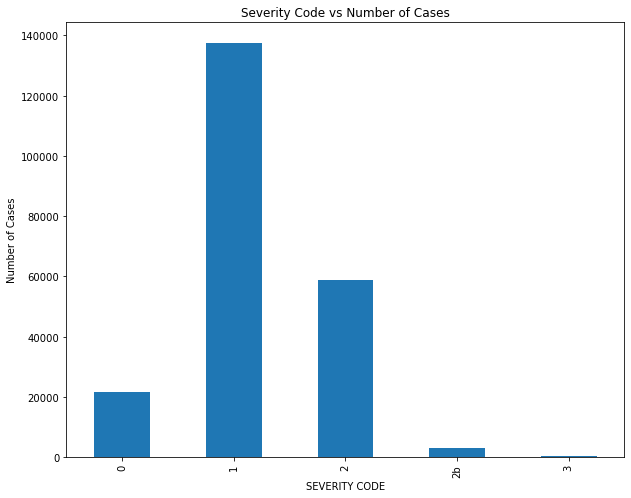

In [43]:
plt.figure(figsize=(10,8))
skw = df.SEVERITYCODE.value_counts().reindex(['0','1','2','2b','3'])
skw.plot(kind='bar')
plt.xlabel('SEVERITY CODE')
plt.ylabel('Number of Cases')
plt.title("Severity Code vs Number of Cases");

Severity Code: <br>
0 - Unknown <br>
1 - Prop Damage <br> 
2 - Injury <br>
2b- Serious Injury<br>
3 - Fatality <br>

This is going to be a **multiclass classification problem**. This code will be change to int data type and replace code of 2b, 3 to become 3, and 4 respectively

New Severity Code
0 - Minor Prop Damage <br>
1 - Prop Damage <br> 
2 - Injury <br>
3- Serious Injury<br>
4 - Fatality <br>

Also, the dataset negatively skewed (unbalanced).
***

### Display Attributes Missing Data

In [15]:
absent_data = df.isnull().sum(axis=0)/df.shape[0]

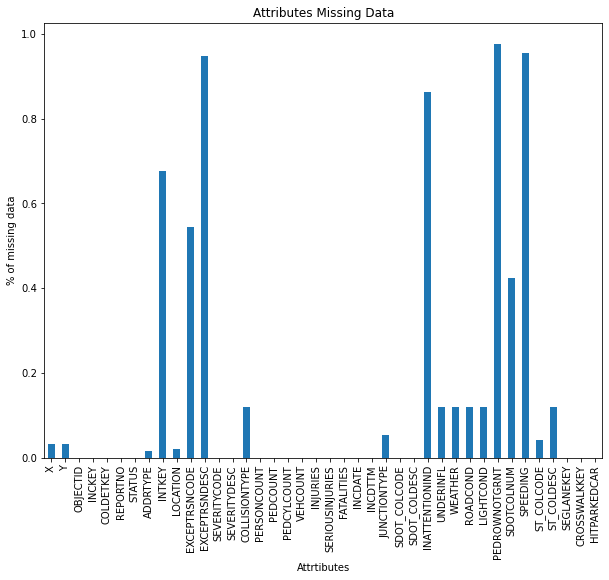

In [19]:
plt.figure(figsize=(10,8))
absent_data.plot(kind='bar')
plt.ylabel("% of missing data")
plt.xlabel("Attrtibutes")
plt.title("Attributes Missing Data");

Not all attributes is going to be used as independent variables. Non relevant attributes such as **OBJECTID** will be removed as well attributes with high percentage of missing data such as **SPEEDING**.
***

## 3. Data Preparation